In [10]:
import numpy as np 
import pandas as pd
data=pd.read_csv('../Dataset/dataset_B_05_2020.csv')
data.columns


Index(['index', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_or', 'nb_eq', 'nb_underscore',
       'nb_tilde', 'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report'

In [11]:
from sklearn.model_selection import train_test_split
X = data.copy()
X['status'] = X['status'].replace({'legitimate': 1})
X['status'] = X['status'].replace({'phishing': 0})
y = X.pop('status')

In [12]:






X = data.drop(columns=['index','status'])

X_train, X_valid, y_train, y_valid = \
    train_test_split(X, y, stratify=y, train_size=0.75)

input_shape = [X_train.shape[1]]
print("Input shape is ", input_shape)
X.head()

Input shape is  [87]


,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,...,0,0,1,0,45,-1,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,...,0,1,0,0,77,5767,0,0,1,2
2,126,50,1,4,1,0,1,2,0,3,...,0,1,0,0,14,4004,5828815,0,1,0
3,18,11,0,2,0,0,0,0,0,0,...,0,1,0,0,62,-1,107721,0,0,3
4,55,15,0,2,2,0,0,0,0,0,...,0,0,1,0,224,8175,8725,0,0,6


In [13]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.BatchNormalization(input_shape=input_shape),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
     layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
     layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid'),
])

In [14]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy',keras.metrics.Precision(),keras.metrics.Recall()],
    
)



In [15]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.01,
    restore_best_weights=True,
)
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=20,
    callbacks=[early_stopping],
    
)

Epoch 1/20
17/17 [==============================] - 3s 61ms/step - loss: 0.2874 - binary_accuracy: 0.8861 - precision_1: 0.8789 - recall_1: 0.8957 - val_loss: 0.4843 - val_binary_accuracy: 0.7565 - val_precision_1: 0.9729 - val_recall_1: 0.5276
Epoch 2/20
17/17 [==============================] - 1s 36ms/step - loss: 0.1429 - binary_accuracy: 0.9500 - precision_1: 0.9490 - recall_1: 0.9510 - val_loss: 0.3875 - val_binary_accuracy: 0.8230 - val_precision_1: 0.9592 - val_recall_1: 0.6746
Epoch 3/20
17/17 [==============================] - 1s 32ms/step - loss: 0.1077 - binary_accuracy: 0.9616 - precision_1: 0.9628 - recall_1: 0.9603 - val_loss: 0.2983 - val_binary_accuracy: 0.8985 - val_precision_1: 0.9191 - val_recall_1: 0.8740
Epoch 4/20
17/17 [==============================] - 1s 30ms/step - loss: 0.0903 - binary_accuracy: 0.9671 - precision_1: 0.9647 - recall_1: 0.9697 - val_loss: 0.2460 - val_binary_accuracy: 0.9234 - val_precision_1: 0.9196 - val_recall_1: 0.9279
Epoch 5/20
17/17 [==

<Axes: >

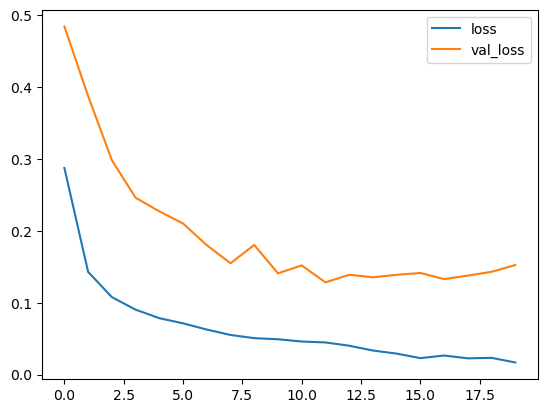

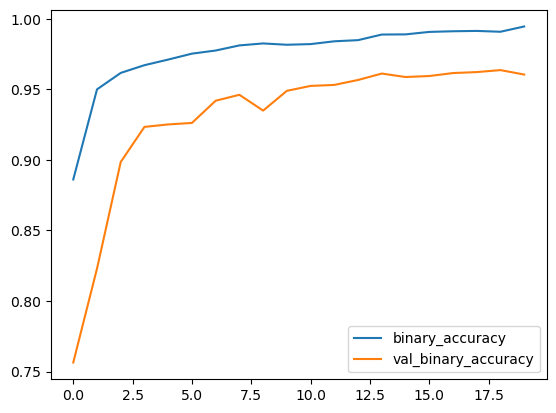

In [21]:
history_df = pd.DataFrame(history.history)
history_df.loc[0:, ['loss', 'val_loss']].plot()
history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot()

#print(f"Best Validation Loss: {history_df['val_loss'].min()}" +\
     # f"\nBest Validation Accuracy: {history_df['val_binary_accuracy'].max()}"+\
     # f"\nBest Recall: {history_df['val_recall'].max()}" +\
      #f"\nBest Precision: {history_df['val_precision'].max()}"
#)